# Discover Insights into Classic Texts

The goal of this project is to discover the main themes and some other details from the two classic novels: Oscar Wilde’s **"The Picture of Dorian Gray"** and Homer’s **"The Iliad"**.  To achieve it, we are going to use `nltk` methods for preprocessing and creating Tree Data Structures, after which, we will apply filters to those Structures to get some desired insights.


## Data Investigation
Let's start with importing tools and texts.

In [49]:
import re
import nltk
from nltk import pos_tag, RegexpParser
from nltk import word_tokenize, sent_tokenize
from IPython.display import display

# import texts
illiad = open("the_iliad.txt",encoding='utf-8').read().lower()
dorian_gray = open("dorian_gray.txt",encoding='utf-8').read().lower()
print(illiad[0:1000])

the iliad of homer


translated by alexander pope,

with notes by the
rev. theodore alois buckley, m.a., f.s.a.

and

flaxman's designs.

1899





contents


introduction.
pope's preface to the iliad of homer
book i.
book ii.
book iii.
book iv.
book v.
book vi.
book vii.
book viii.
book ix.
book x.
book xi.
book xii.
book xiii.
book xiv.
book xv.
book xvi.
book xvii.
book xviii.
book xix.
book xx.
book xxi.
book xxii.
book xxiii.
book xxiv.
concluding note.





illustrations


homer invoking the muse.
mars.
minerva repressing the fury of achilles.
the departure of briseis from the tent of achilles.
thetis calling briareus to the assistance of jupiter.
thetis entreating jupiter to honour achilles.
vulcan.
jupiter.
the apotheosis of homer.
jupiter sending the evil dream to agamemnon.
neptune.
venus, disguised, inviting helen to the chamber of paris.
venus presenting helen to paris.
venus.
map, titled "graeciae antiquae".
the council of the gods.
map of the plain of troy.
venus, wounded

With the text imported, now you need to split the text into individual sentences and then individual words. This allows us to perform a sentence-by-sentence parsing analysis.

In [50]:
def word_sent_tokenize(text):
    word_sent_tokenized = [word_tokenize(s) for s in sent_tokenize(text)]
    return word_sent_tokenized

In [51]:
word_sent_tokenize(illiad)[0]

['the',
 'iliad',
 'of',
 'homer',
 'translated',
 'by',
 'alexander',
 'pope',
 ',',
 'with',
 'notes',
 'by',
 'the',
 'rev',
 '.']

In [52]:
word_sent_tokenize(dorian_gray)[0]

['the',
 'picture',
 'of',
 'dorian',
 'gray',
 'by',
 'oscar',
 'wilde',
 'the',
 'preface',
 'the',
 'artist',
 'is',
 'the',
 'creator',
 'of',
 'beautiful',
 'things',
 '.']

## Tagging

Next we are going to put part-of-speech tag to each sentence for syntax parsing.

In [53]:
def pos_tag_text(tokenised_text):
    pos_tagged_text = [pos_tag(w) for w in tokenised_text]
    return pos_tagged_text

In [54]:
pos_tagged_illiad = pos_tag_text(word_sent_tokenize(illiad))
pos_tagged_illiad[0]

[('the', 'DT'),
 ('iliad', 'NN'),
 ('of', 'IN'),
 ('homer', 'NN'),
 ('translated', 'VBN'),
 ('by', 'IN'),
 ('alexander', 'NN'),
 ('pope', 'NN'),
 (',', ','),
 ('with', 'IN'),
 ('notes', 'NNS'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('rev', 'NN'),
 ('.', '.')]

In [55]:
pos_tagged_dorian_gray = pos_tag_text(word_sent_tokenize(dorian_gray))
pos_tagged_dorian_gray[0]

[('the', 'DT'),
 ('picture', 'NN'),
 ('of', 'IN'),
 ('dorian', 'JJ'),
 ('gray', 'JJ'),
 ('by', 'IN'),
 ('oscar', 'NN'),
 ('wilde', 'NN'),
 ('the', 'DT'),
 ('preface', 'NN'),
 ('the', 'DT'),
 ('artist', 'NN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('creator', 'NN'),
 ('of', 'IN'),
 ('beautiful', 'JJ'),
 ('things', 'NNS'),
 ('.', '.')]

## Sentences Chunking
Now that we have part-of-speech tagged our texts, we can move on to syntax parsing. We are going to use Noun and Verb Phrases chunks to perform it. 

In [56]:
def chunk_text(pos_tagged_text):
    # Noun phrase chunk grammar
    np_chunk_grammar = r"""NP: {<JJ>*<NN.*>} 
                            }<DT>{""" # Exclude from chunk 
    # Verb phrase chunk grammar
    vp_chunk_grammar = r"""VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}
                            }<DT>{""" # Exclude from chunk

    # Create NP RegexpParser object
    np_chunk_parser = RegexpParser(np_chunk_grammar) 
    # Create VP RegexpParser object
    vp_chunk_parser = RegexpParser(vp_chunk_grammar) 

    np_chunked_text = [np_chunk_parser.parse(w) for w in pos_tagged_text]
    vp_chunked_text = [vp_chunk_parser.parse(w) for w in pos_tagged_text]

    return np_chunked_text, vp_chunked_text

In [57]:
np_chunked_illiad, vp_chunked_illiad = chunk_text(pos_tagged_illiad)

Let's check Tree Structure of Noun and Verb Phrases in some sentences from "The Illiad".

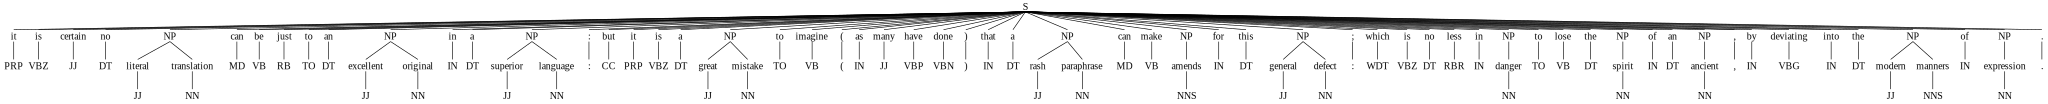

In [58]:
display(np_chunked_illiad[568])

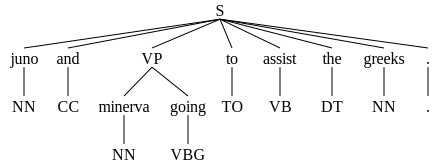

In [59]:
display(vp_chunked_illiad[53])

In [60]:
np_chunked_dorian_gray, vp_chunked_dorian_gray = chunk_text(pos_tagged_dorian_gray)

Now the Structure of Noun and Verb Phrases in sentences from "The Picture of Dorian Gray".

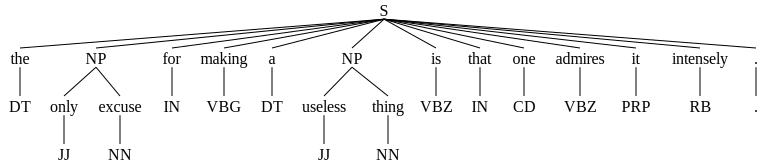

In [61]:
display(np_chunked_dorian_gray[32])

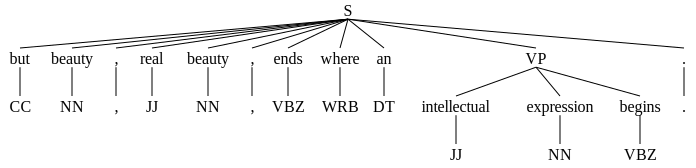

In [62]:
display(vp_chunked_dorian_gray[64])

## Chunks Analysis

Now that we have chunked your novel, we can analyze the chunk frequencies to gain insights.

In [63]:
def chunk_counter(list_of_chunks, label):
    word_freq = nltk.FreqDist()
    for tree in list_of_chunks:
        for chunk in tree.subtrees(lambda node: node.label() == label):
            word_freq[str(chunk.flatten())] += 1
    return word_freq

In [64]:
chunk_counter(np_chunked_illiad, 'NP').most_common(30)

[('(NP arms/NNS)', 350),
 ('(NP hector/NN)', 328),
 ('(NP war/NN)', 312),
 ('(NP achilles/NNS)', 275),
 ('(NP gods/NNS)', 274),
 ('(NP i/NN)', 274),
 ('(NP jove/NN)', 257),
 ('(NP god/NN)', 241),
 ('(NP son/NN)', 224),
 ('(NP troy/NN)', 214),
 ('(NP plain/NN)', 200),
 ('(NP vain/NN)', 197),
 ('(NP fight/NN)', 181),
 ('(NP day/NN)', 180),
 ('(NP ground/NN)', 172),
 ('(NP chief/NN)', 170),
 ('(NP hand/NN)', 168),
 ('(NP field/NN)', 167),
 ('(NP trojan/NN)', 164),
 ('(NP fate/NN)', 159),
 ('(NP thou/NN)', 158),
 ('(NP death/NN)', 154),
 ('(NP eyes/NNS)', 154),
 ('(NP hero/NN)', 149),
 ('(NP king/NN)', 147),
 ('(NP greeks/NN)', 144),
 ('(NP man/NN)', 143),
 ('(NP greece/NN)', 137),
 ('(NP heaven/NN)', 137),
 ('(NP rage/NN)', 136)]

In [65]:
chunk_counter(vp_chunked_illiad, 'VP').most_common(30)

[("(VP 't/NN is/VBZ)", 19),
 ('(VP i/NN am/VBP)', 11),
 ("(VP 't/NN was/VBD)", 11),
 ('(VP hero/NN said/VBD)', 9),
 ('(VP i/NN know/VBP)', 8),
 ('(VP i/NN saw/VBD)', 8),
 ('(VP scene/NN lies/VBZ)', 7),
 ('(VP i/NN was/VBD)', 6),
 ("(VP confess/NN 'd/VBD)", 6),
 ('(VP scene/NN is/VBZ)', 6),
 ("(VP view/NN 'd/VBD)", 5),
 ('(VP i/NN felt/VBD)', 5),
 ('(VP i/NN bear/VBP)', 5),
 ('(VP war/NN be/VB)', 5),
 ('(VP weapon/NN stood/VBD)', 5),
 ('(VP silence/NN broke/VBD)', 5),
 ('(VP war/NN is/VBZ)', 5),
 ('(VP father/NN gave/VBD)', 5),
 ('(VP hector/NN is/VBZ)', 5),
 ('(VP vain/NN was/VBD)', 5),
 ('(VP homer/NN was/VBD)', 4),
 ('(VP author/NN is/VBZ)', 4),
 ('(VP i/NN have/VBP)', 4),
 ('(VP goddess/NN born/VBN)', 4),
 ('(VP hunger/NN was/VBD)', 4),
 ('(VP glory/NN lost/VBN)', 4),
 ('(VP i/NN see/VBP)', 4),
 ('(VP i/NN go/VBP)', 4),
 ('(VP trojan/NN bands/VBZ)', 4),
 ('(VP cold/NN remains/VBZ)', 4)]

In [66]:
chunk_counter(np_chunked_dorian_gray, 'NP').most_common(30)

[('(NP i/NN)', 963),
 ('(NP i/NNS)', 204),
 ('(NP henry/NN)', 200),
 ('(NP lord/NN)', 198),
 ('(NP life/NN)', 184),
 ('(NP harry/NN)', 136),
 ('(NP man/NN)', 135),
 ('(NP dorian/JJ gray/NN)', 128),
 ('(NP something/NN)', 126),
 ('(NP nothing/NN)', 93),
 ('(NP basil/NN)', 85),
 ('(NP face/NN)', 84),
 ('(NP time/NN)', 78),
 ('(NP world/NN)', 78),
 ('(NP eyes/NNS)', 75),
 ('(NP hallward/NN)', 71),
 ('(NP everything/NN)', 69),
 ('(NP room/NN)', 69),
 ('(NP anything/NN)', 68),
 ('(NP things/NNS)', 68),
 ('(NP art/NN)', 64),
 ('(NP people/NNS)', 64),
 ('(NP picture/NN)', 63),
 ('(NP door/NN)', 62),
 ('(NP love/NN)', 57),
 ('(NP hand/NN)', 57),
 ('(NP thing/NN)', 56),
 ('(NP moment/NN)', 55),
 ('(NP men/NNS)', 54),
 ('(NP soul/NN)', 52)]

In [67]:
chunk_counter(vp_chunked_dorian_gray, 'VP').most_common(30)

[('(VP i/NN am/VBP)', 101),
 ('(VP i/NN was/VBD)', 40),
 ('(VP i/NN want/VBP)', 38),
 ('(VP i/NN know/VBP)', 33),
 ("(VP i/NN do/VBP n't/RB)", 32),
 ('(VP i/NN have/VBP)', 32),
 ('(VP i/NN had/VBD)', 31),
 ('(VP i/NN suppose/VBP)', 17),
 ('(VP i/NN think/VBP)', 16),
 ('(VP i/NN am/VBP not/RB)', 14),
 ('(VP i/NN thought/VBD)', 13),
 ('(VP i/NN believe/VBP)', 12),
 ('(VP dorian/JJ gray/NN was/VBD)', 11),
 ('(VP i/NN am/VBP so/RB)', 11),
 ('(VP henry/NN had/VBD)', 11),
 ("(VP i/NN did/VBD n't/RB)", 9),
 ('(VP i/NN met/VBD)', 9),
 ('(VP i/NN said/VBD)', 9),
 ('(VP i/NN am/VBP quite/RB)', 8),
 ('(VP i/NN see/VBP)', 8),
 ('(VP i/NN did/VBD not/RB)', 7),
 ('(VP i/NN have/VBP ever/RB)', 7),
 ('(VP life/NN is/VBZ)', 7),
 ('(VP life/NN has/VBZ)', 7),
 ('(VP i/NN did/VBD)', 6),
 ('(VP man/NN is/VBZ)', 6),
 ('(VP i/NN feel/VBP)', 6),
 ('(VP lad/NN was/VBD)', 6),
 ('(VP i/NN asked/VBD)', 6),
 ('(VP one/NN has/VBZ)', 6)]

Additionally, let's find out the word count for both text to compare them.

In [68]:
len(word_tokenize(illiad))

213493

In [69]:
len(word_tokenize(dorian_gray))

95260

Analysis of **"The Picture of Dorian Gray"**: 

- The "The Picture of Dorian Gray" is far more character-centred than "Illiad" - the word "I" occurs about 1000 times in it, and verb phrases like "I am", "I was", "I want", "I know", "I do", "I have", "I think", "I believe", "I feel" and many other different variations with "I" are also far more common in "The Picture of Dorian Gray". It tells us that, for Oscar Wilde, characters' thoughts, actions, needs, desires and feelings are far more important than to Homer. It is a significant distinction considering that the "Illiad" exceeds  "The Picture of Dorian Gray" more than 2 times by word count. 

- Important characters in the text, based on their occurrence frequency are Henry, Harry, Dorian Gray, Basil, and Hallward. Although without reading is hard to tell whether the Basil is a person or a plant, I have read this book so I know that it's a character's name.

- Frequent usage of the noun "lord" notifies us about the historical context and major social class which dominates the storline.

- Such nouns as: "life", "man", "face", "time", "world", "eyes", "art", "picture", "love", "soul" occur very frequently and by them we can reconstruct the main themes of the novel. The author probably often talks about man's life, art, love, the passage of time, the soul of a man, face and eyes of a man. Considering that the novel's name is "The Picture of Dorian Gray", one can tell that the word "picture", "face" and "eyes" are interconnected and probably the author mainly means the face and eyes of Dorian.

Analysis of **"The Iliad"**:

- Unlike "The Picture of Dorian Gray", Homer's "The Iliad" is not so concerned with the characters' personal thoughts, feelings, desires and beliefs. The pronoun "I" occurs only 274 times. The number of verb phrases containing "I" is also very low - each appears only 5-8 times on average.  For instance, the verb phrase "I am" occurs only 11 times, while its count in "The Picture of Dorian Gray" is 101 times. 

- The only characters whose names occur frequently are "Hector", "Achilles" and "Jove". Other nouns are abstract and generic, : "gods", "son", "chief", "hero", "king", "greeks" - they embody an era rather than specific characters. 

- There are many phrases that correlate with war and death: "fight", "rage", "war be", "war is", "weapon stood", "glory lost", "hungar was", "trojan bands", "cold remains". The word "war" itself is nearly as popular as the main character "Hector", it occurs 312 times, word "death" - is 154 times. One can even say that "war" is another main "character" of this novel. 

- The main themes of the "Illiad", based on the most common phrases could be:
- the Troyan war itself and its influence on the history of Greek nations', 
- the deeds of war heroes; 
- the role of gods in human life;
- relationship between a father and a son, 
- death in war as a special kind of death;
- human fate, probably in the context of its fatal dependence on gods' good or bad will. 

- Looking at `most_common_vp_chunks`, you we see that verb phrases of the form we defined in our chunk grammar do not appear as often in "The Iliad" as noun phrases. This can indicate a different style of writing taken by the author that does not follow traditional grammatical style (i.e. poetry). So even when chunks are not found, their absence can give us insight.

## Conclusion

We have performed a syntax parsing analysis of the two classic novels. From our brief analysis, we gained insight into the main themes of these texts as well as the authors' writing styles and historical contexts contemporary to them.